**Langkah 1 - Load Library**

In [1]:
# Melakukan
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

c:\Users\Hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Langkah 2 - Unduh Dataset CIFAR**

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
# Mengubah nilai piksel gambar dalam data pelatihan dan data pengujian
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 59s 0us/step


**Langkah 3 - Verifikasi Data**

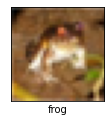

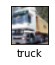

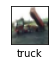

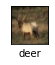

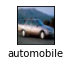

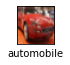

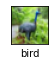

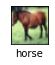

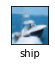

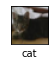

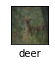

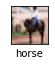

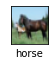

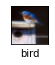

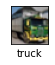

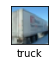

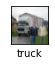

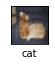

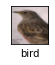

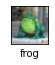

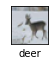

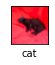

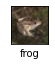

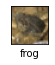

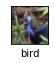

In [5]:
# Daftar nama kelas yang digunakan dalam dataset CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

# Mengatur ukuran gambar untuk ditampilkan
plt.figure(figsize=(10,10))
# Loop untuk menampilkan 25 gambar dari dataset
for i in range(25):
    # Mengatur subplot yang akan menampilkan gambar-gambar dalam bentuk grid 5x5
    plt.subplot(5,5,i+1)
    # Menghilangkan label sumbu x 
    plt.xticks([])
    # Menghilangkan label sumbu y
    plt.yticks([])
    # Menghilangkan garis-garis grid pada subplot
    plt.grid(False)

    # Menampilkan gambar
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    # Menampilkan label kelas yang sesuai dengan gambar
    plt.xlabel(class_names[train_labels[i][0]])
    # Menampilkan setiap subplot secara terpisah
    plt.show()

**Langkah 4 - Buat Model CNN**

**Langkah 4.1. - Buat Layer Konvolusi**

In [6]:
# Membuat objek model sequential yang akan digunakan untuk membangun arsitektur jaringan
model = models.Sequential()
# Menambahkan lapisan konvolusi pertama ke model
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# Menambahkan lapisan max-pooling setelah lapisan konvolusi pertama
model.add(layers.MaxPooling2D((2, 2)))
# Menambahkan lapisan konvolusi kedua ke model
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Menambahkan lapisan max-pooling setelah lapisan konvolusi kedua.
model.add(layers.MaxPooling2D((2, 2)))
# Menambahkan lapisan konvolusi ketiga ke mode
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

**Langkah 4.2. - Cek Arsitektur Konvolusi**

In [7]:
# Menampilkan summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

**Langkah 4.3. - Tambahkan Layer Fully Connected**

In [8]:
# Lapisan Flatten yang mengubah representasi data dari format matriks multidimensi menjadi vektor satu dimensi
model.add(layers.Flatten())
# iMemproses representasi vektor dari lapisan Flatten sebelumnya dan mempelajari hubungan antara fitur-fitur.
model.add(layers.Dense(64, activation='relu'))
# Output akan digunakan untuk klasifikasi mult
model.add(layers.Dense(10))

**Langkah 4.4. - Cek Arsitektur Model CNN**

In [9]:
# Menampilkan summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

**Langkah 4.5. - Compile Model CNN**

In [10]:
# Melakukan compile model 
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),    metrics=['accuracy'])

**Langkah 5 - Fit Model**

In [11]:
# Melatih model dengan 10 iterasi epoch
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 60s 37ms/step - loss: 1.5021 - accuracy: 0.4544 - val_loss: 1.2885 - val_accuracy: 0.5424
Epoch 2/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.1432 - accuracy: 0.5945 - val_loss: 1.0588 - val_accuracy: 0.6221
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9818 - accuracy: 0.6541 - val_loss: 1.0207 - val_accuracy: 0.6469
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8822 - accuracy: 0.6917 - val_loss: 0.8969 - val_accuracy: 0.6847
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8073 - accuracy: 0.7166 - val_loss: 0.8958 - val_accuracy: 0.6919
Epoch 6/10
1563/1563 [==============================] - 90s 57ms/step - loss: 0.7527 - accuracy: 0.7359 - val_loss: 0.8915 - val_accuracy: 0.6969
Epoch 7/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.6993 - accuracy: 0.7533 - val_loss: 0.8957 -

**Langkah 6 - Evaluasi Model**

313/313 - 4s - loss: 0.9010 - accuracy: 0.7073 - 4s/epoch - 12ms/step


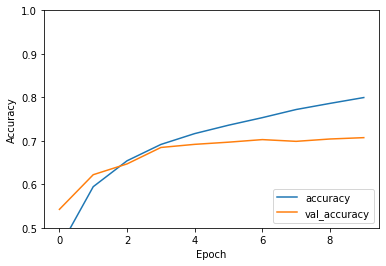

In [12]:
# Membuat plot kurva pelatihan untuk akurasi pada data pelatihan
plt.plot(history.history['accuracy'], label='accuracy')
# Membuat plot kurva pelatihan untuk akurasi pada data validasi.
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# Memberi label pada sumbu x dan y
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Mengatur batas rentang sumbu y pada plot dari 0.5 hingga 1
plt.ylim([0.5, 1])
# Menambahkan legenda ke plot, yang menunjukkan label "accuracy" dan "val_accuracy" 
plt.legend(loc='lower right')
# Menghitung Akurasi
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

**Langkah 7 - Cetak Hasil Akurasi**

In [13]:
# Mencetak hasil akurasi
print(test_acc)

0.7073000073432922
